## 1.0. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy
import scipy.spatial.distance
%matplotlib inline
features = ['X1', 'X2', 'X3', 'X4','X5', 'X6', 'X7', 'X8', 'X9'] 
f_len = len(features)

## 1.1. Импорт данных

In [7]:
data = pd.read_excel('Dannye_1_1.xlsx', sheet_name='Данные для питона').loc[:, features]
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-0.466334,-0.499452,-1.195254,-1.507236,0.069739,0.207068,-0.626404,-0.266906,-0.251121
1,-0.785712,-0.855048,-1.298529,-1.448984,0.329812,-0.109225,-0.316544,0.106932,-0.394951
2,-1.034117,-0.979066,-0.317418,-0.827632,-1.342087,-0.202253,0.406464,-0.999628,-0.682612
3,-1.424468,-0.768632,-1.453441,-0.245114,-0.264641,0.225674,0.561394,-1.109287,-0.768011
4,0.598260,-0.709319,-1.943996,-0.497539,0.682768,-0.518546,-1.349412,-0.629528,-0.535785


## 1.2. Стандартизация данных

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_data=pd.DataFrame(ss.fit_transform(data),columns=data.columns,index=data.index)
scaled_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-0.469101,-0.502416,-1.202347,-1.516181,0.070153,0.208297,-0.630122,-0.268490,-0.252611
1,-0.790375,-0.860122,-1.306235,-1.457584,0.331769,-0.109873,-0.318422,0.107567,-0.397295
2,-1.040255,-0.984877,-0.319302,-0.832544,-1.350051,-0.203453,0.408876,-1.005561,-0.686663
3,-1.432922,-0.773194,-1.462067,-0.246569,-0.266211,0.227013,0.564726,-1.115871,-0.772569
4,0.601811,-0.713528,-1.955533,-0.500492,0.686820,-0.521623,-1.357420,-0.633265,-0.538965
...,...,...,...,...,...,...,...,...,...
80,-2.253955,1.491661,-1.332207,1.511356,-0.116716,0.563899,-0.266472,-0.348715,2.000536
81,-0.326313,0.851401,-0.241386,0.905848,-1.350051,1.237672,-0.682072,-0.252194,4.698285
82,-0.040737,-0.040581,-0.267358,0.358938,-0.322272,0.096002,-0.785971,0.189046,1.278625
83,-1.647105,1.143875,-0.579021,0.964446,0.593386,-1.176680,-1.824969,-0.019039,1.367545


## 1.3. Построение дендрограмм

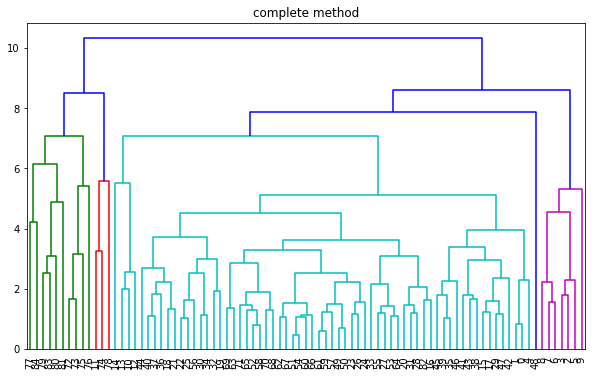

In [ ]:
methods = ['complete', 'ward', 'single', 'average', 'weighted']
for method in methods:
    Z = hierarchy.linkage(scaled_data, method=method, optimal_ordering=True)
    #строим дендрограмму

    plt.figure(figsize=(10,6)) # задаем размеры окна с графиками

    hierarchy.dendrogram(Z, labels=scaled_data.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

    plt.title('{} method'.format(method))
   

## Опционально. Удаление выбросов.

In [5]:
#Проверка с помощью k-means

In [5]:
n_clusters = 4

kmeans = KMeans(n_clusters = n_clusters, random_state=36) 
kmeans.fit(scaled_data); 
scaled_data['kmeans'] = kmeans.labels_
cluster_dict={}
for i in range(n_clusters):
    clust_list = scaled_data[scaled_data['kmeans']==i][features].index.values 
    print('Состав кластера {}: {}'.format(i, clust_list))


Состав кластера 0: ['Кабардино-Балкарская \nРеспублика' 'Камчатский край'
 'Краснодарский край' 'Курская область' 'Республика Хакасия'
 'Ростовская область' 'Смоленская область' 'Удмуртская Республика'
 'Хабаровский край ' 'Челябинская область' 'Чувашская Республика'
 'Чукотский автономный округ']
Состав кластера 1: ['Карачаево-Черкесская Рес-публика' 'Ярославская область']
Состав кластера 2: ['Ленинградская область' 'Липецкая область' 'Магаданская область'
 'Мурманская область' 'Новосибирская область ' 'Омская область'
 'Оренбургская область' 'Орловская область' 'Пермский край'
 'Приморский край' 'Республика Северная \nОсетия – Алания'
 'Самарская область' 'Саратовская область' 'Свердловская область '
 'Тюменская область' 'Ульяновская область'
 'Ямало-Ненецкий автономный \nокруг']
Состав кластера 3: ['Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская 

In [61]:
#Избавление от выбросов (опционально)

In [36]:
labels = ['г. Москва']
data.drop(labels=labels, inplace=True)
index = data.index
scaled = (data - data.mean(axis=0))/data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()
methods = ['complete', 'ward', 'single', 'average', 'weighted']
for method in methods:
    Z = hierarchy.linkage(scaled_data, method=method, optimal_ordering=True)
    plt.figure(figsize=(20,12))
    hierarchy.dendrogram(Z, labels=scaled_data.index, leaf_font_size=10)
    plt.title('{} method'.format(method))


ValueError: The condensed distance matrix must contain only finite values.

## 1.4. Кластеризация.

In [8]:
CLUSTER_METHODS = ["complete", "ward", "kmeans", "single", "average",'weighted']
N_CLUSTERS = {
    "complete" : 7,
    "ward"     : 4,
    "kmeans"  : 6,
    "single" : 4,
    "average" : 5,
    "weighted" : 5,
}
#метод полных связей
complete = AgglomerativeClustering(n_clusters=N_CLUSTERS['complete'], linkage='complete')
complete.fit(scaled_data)
#метод варда
ward = AgglomerativeClustering(n_clusters=N_CLUSTERS['ward'], linkage='ward')
ward.fit(scaled_data);
#метод kmeans
kmeans = KMeans(n_clusters=N_CLUSTERS['kmeans'], random_state=36)
kmeans.fit(scaled_data);
#метод одиночных связей
single = AgglomerativeClustering(n_clusters=N_CLUSTERS['single'], linkage='single')
single.fit(scaled_data)
#метод невзвешенного попарного среднего
average = AgglomerativeClustering(n_clusters=N_CLUSTERS['average'], linkage='average')
average.fit(scaled_data)
#метод взвешенного попарного среднего
Z=scipy.cluster.hierarchy.weighted(scipy.spatial.distance.pdist(scaled_data))
weighted=scipy.cluster.hierarchy.fcluster(Z, 4.84, criterion='distance')
weighted

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 8, 1,
       6, 6, 6, 6, 6, 6, 4, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 2],
      dtype=int32)

## 1.5. Работа с метками кластеров. Построение графиков средних значений.

In [11]:
#дополнение меток кластеров в исходный ДФ
scaled_data['complete'] = complete.labels_
scaled_data['ward'] = ward.labels_
scaled_data['kmeans'] = kmeans.labels_
scaled_data['single'] = single.labels_
scaled_data['average'] = average.labels_
scaled_data['weighted']= weighted

def mean_df(method, n_clust):
    mean_data = np.array([]).reshape(0, f_len+1)
    for n in range(n_clust):
        tmp = [] 
        for j in range(f_len):
            tmp.append(scaled_data[scaled_data[method] == n].iloc[:, j].mean())
            
        tmp.append(scaled_data[scaled_data[method] == n].shape[0])
        mean_data = np.vstack((mean_data, np.array(tmp).reshape(1, f_len+1)))

    return mean_data

columns = features + ['count']
means = {}
dfs = []
path = "means.xlsx" 
writer = pd.ExcelWriter(path, engine = 'xlsxwriter') 

for method, n in N_CLUSTERS.items():
    means[method] = pd.DataFrame(
        mean_df(method, n), 
        columns=columns, 
        index=["{}_{}".format(method, i) for i in range(n)]
    )


    means[method].to_excel(writer, sheet_name = '{} means'.format(method))
writer.save()

for method in CLUSTER_METHODS:
    print(means[method])


                  x1        x2        x3        x4        x5        x6  \
complete_0  0.130510  3.561746 -0.514091  6.220326  3.001293 -0.139433   
complete_1  0.119933 -0.150742  0.287086 -0.173067 -0.086342 -0.076027   
complete_2 -1.819412 -0.776318 -1.842988 -0.078237 -0.529968 -0.664061   
complete_3  0.589996  0.241616  0.511800 -0.150164  0.076282 -0.655210   
complete_4  2.061124  1.709696  0.329996  0.246462  0.233380  1.519301   
complete_5  2.119043  2.979367 -1.825673 -0.349428 -0.590522  7.070212   
complete_6  1.007009  3.624195 -1.539982  0.211791  4.772189  2.047658   

                  x7        x8        x9  count  
complete_0  2.155959  0.010855  6.003890    2.0  
complete_1 -0.180969  0.013775 -0.176722   69.0  
complete_2 -0.248623 -1.009078 -0.200923    9.0  
complete_3  6.796403 -0.435077 -0.165682    1.0  
complete_4  0.800336  2.389216  0.806055    2.0  
complete_5  1.109125  4.371843 -0.249817    1.0  
complete_6  0.906348 -0.605648  0.797750    1.0  
       

## 1.6. Построение графиков средних.

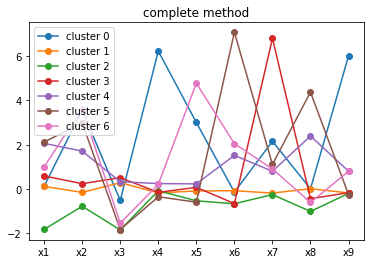

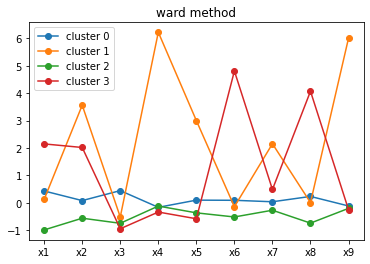

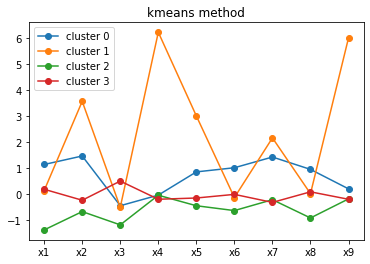

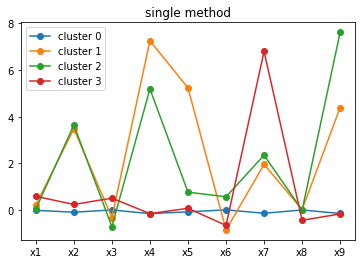

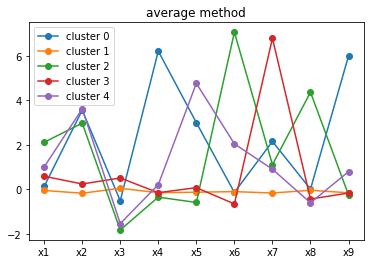

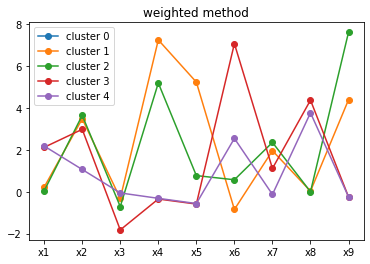

In [12]:
for method in CLUSTER_METHODS:
    # в cur_mean записывается элемент словаря means, соот-ветствующий ключу method (т.е. средние значения признаков в кластерых для метода method)
    cur_mean = means[method] 
    plt.figure(figsize=(6,4))
   #для каждого кластера из данного метода строим график
    for n in range(cur_mean.shape[0]): 
        plt.plot(features, cur_mean.iloc[n, :-1].values, marker='o', label='cluster {}'.format(n))
        plt.legend(loc = 'upper left') #легенда графика
    plt.title('{} method'.format(cur_mean.index[0][:-2])) #назва-ние 


## 1.7. Выгрузка элементов в кластерах.

In [25]:
features=['X'+str(i) for i in range(1,10)]
cluster_dict = {}
path = r"C:\Users\1\Desktop\7 сем\Макростат. анализ и прогноз\1 лр\members.xlsx" 
writer = pd.ExcelWriter(path, engine = 'xlsxwriter') 

for method, n in N_CLUSTERS.items():
     #выводим заголовки методов
    print('{} method\n'.format(method)) 
    dfs = []  
     #для каждого кластера проходимся по объектам и запи-сываем их в словарь
    for i in range(n+1): 
        cluster_dict['{}_{}'.format(method, i)] = scaled_data[scaled_data[method]==i][features]
        
        #Записываем элементы кластеров в файл members. Файл создается в той же директории, где лежит ноутбук с кодом
        cluster_dict['{}_{}'.format(method, i)].to_excel(writer, sheet_name = '{}_{}'.format(method, i))
        
        #выводим на экран состав кластеров
        print ('Состав кластера {}: {}'
              .format(i, cluster_dict['{}_{}'.format(method, i)].index.values))      
    print ('\n')
writer.close()


complete method

Состав кластера 0: ['Карачаево-Черкесская Рес-публика' 'Ярославская область']
Состав кластера 1: ['Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'г. Москва' 'г. Санкт-Петербург' 'г. Севастополь'
 'Еврейская автономная область' 'Забайкальский край' 'Ивановская область'
 'Иркутская область' 'Калининградская область' 'Калужская область'
 'Кемеровская область' 'Кировская область' 'Костромская область'
 'Краснодарский край' 'Красноярский край' 'Курганская область'
 'Ленинградская область' 'Липецкая область' 'Московская область'
 'Мурманская область' 'Ненецкий автономный округ' 'Нижегородская область '
 'Новгородская область' 'Пензенская область' 'Приморский край'
 'Псковская область' 'Республика Адыгея' 'Республика Алтай'
 'Республика Башкортостан' 'Республика Бурятия' 'Республика Дагестан'
 'Республика И

## 1.8. Функционал качества разбиения.

## 1.9. Таблица средних.

In [26]:
mean_data = pd.DataFrame()
for method in CLUSTER_METHODS:
    mean_data = mean_data.append(means[method])
mean_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,count
complete_0,0.130510,3.561746,-0.514091,6.220326,3.001293,-0.139433,2.155959,0.010855,6.003890,2.0
complete_1,0.119933,-0.150742,0.287086,-0.173067,-0.086342,-0.076027,-0.180969,0.013775,-0.176722,69.0
complete_2,-1.819412,-0.776318,-1.842988,-0.078237,-0.529968,-0.664061,-0.248623,-1.009078,-0.200923,9.0
complete_3,0.589996,0.241616,0.511800,-0.150164,0.076282,-0.655210,6.796403,-0.435077,-0.165682,1.0
complete_4,2.061124,1.709696,0.329996,0.246462,0.233380,1.519301,0.800336,2.389216,0.806055,2.0
complete_5,2.119043,2.979367,-1.825673,-0.349428,-0.590522,7.070212,1.109125,4.371843,-0.249817,1.0
complete_6,1.007009,3.624195,-1.539982,0.211791,4.772189,2.047658,0.906348,-0.605648,0.797750,1.0
ward_0,0.434235,0.084100,0.447605,-0.161184,0.100232,0.094878,0.041299,0.235382,-0.111734,53.0
ward_1,0.130510,3.561746,-0.514091,6.220326,3.001293,-0.139433,2.155959,0.010855,6.003890,2.0
ward_2,-0.984834,-0.557886,-0.743201,-0.115407,-0.362813,-0.513025,-0.267082,-0.737004,-0.199659,28.0


## 1.10. Качество разбиения по каждому методу.

In [27]:
Dw=pd.DataFrame(columns=features)
quality=pd.DataFrame(columns=['Q1','method'])
for j in CLUSTER_METHODS:
    for i in scaled_data[j].unique():
        Dw=Dw.append(((scaled_data[scaled_data[j]==i]-
            pd.pivot_table(scaled_data,columns=j)[4:].loc[:,i])**2).sum(),ignore_index=True)
    print(f'Q1={np.sum(Dw.to_numpy())}, method: {j}',)
    quality=quality.append({'Q1':np.sum(Dw.to_numpy()),'method':j},ignore_index=True)
    Dw=pd.DataFrame(columns=features)
quality.T

Q1=274.52780778935033, method: complete
Q1=363.6211126056752, method: ward
Q1=374.1950341830568, method: kmeans
Q1=528.1058230481309, method: single
Q1=370.4885983822526, method: average
Q1=196.1945244982048, method: weighted


,0,1,2,3,4,5
Q1,274.528,363.621,374.195,528.106,370.489,196.195
method,complete,ward,kmeans,single,average,weighted
